# TFM

## Importación de librerías

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import toml
import random
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score, 
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

## Ejecución de código en GPU

In [44]:
import tensorflow as tf

# Comprobar la versión de TensorFlow
print("TensorFlow version:", tf.__version__)

# Listar todos los dispositivos físicos disponibles
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    print("🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):")
    for gpu in physical_devices:
        print(f'\t{gpu}')
else:
    print("🔴 No se ha detectado ninguna GPU. TensorFlow está utilizando la CPU.")

TensorFlow version: 2.10.0
🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):
	PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## Lectura de fichero

In [45]:
data_dict = {}
DATA_DIR = '../../data/'

for data_folder in os.listdir(DATA_DIR):
    *data_files, config_file = os.listdir(f'{DATA_DIR}/{data_folder}')

    leak_value = toml.load(f'{DATA_DIR}/{data_folder}/{config_file}')['tanks']['flow_value']

    train_dataframe, test_data = random.sample(data_files, 2)

    data_dict[data_folder] = {
        'leak_value': leak_value,
        'train_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{train_dataframe}').drop(columns=['Unnamed: 0']),
        'test_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{test_data}').drop(columns=['Unnamed: 0'])
    }

### Conjuntos de datos de entrenamiento

In [46]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200006288,83",-6065,"7055,95","1200007279,78","1200007252,92","-26,86","336,65",0
1,2,"1200007252,92",-6210,"5920,32","1200006963,24","1200007040,39","77,15","380,53",0
2,3,"1200007040,39",-5955,"7938,58","1200009023,97","1200009091,19","67,22","437,66",0
3,4,"1200009091,19",-6210,"5927,74","1200008808,93","1200008902,38","93,45","534,0",0
4,5,"1200008902,38",-6070,"6597,15","1200009429,53","1200009389,35","-40,18","511,14",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199601193,57",-6005,"5844,39","1199601032,96","1199600561,07","-471,89","-5088,9",1
1496,1497,"1199600561,07",-6150,"6027,48","1199600438,55","1199599895,03","-543,52","-5104,87",1
1497,1498,"1199599895,03",-6205,"3055,49","1199596745,52","1199596134,46","-611,06","-5188,32",1
1498,1499,"1199596134,46",-6305,"7015,74","1199596845,2","1199596287,72","-557,48","-5233,09",1


### Conjunto de datos de prueba

In [47]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200003986,98",-6130,"7891,45","1200005748,43","1200005832,94","84,51","339,56",0
1,2,"1200005832,94",-6140,"4059,41","1200003752,35","1200003686,66","-65,69","295,02",0
2,3,"1200003686,66",-6090,"8024,37","1200005621,03","1200005618,11","-2,92","291,44",0
3,4,"1200005618,11",-6335,"6950,69","1200006233,8","1200006278,82","45,02","322,9",0
4,5,"1200006278,82",-6095,"7061,47","1200007245,29","1200007212,06","-33,23","306,5",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199601540,19",-6040,"4405,01","1199599905,2","1199599444,25","-460,95","-5326,75",1
1496,1497,"1199599444,25",-5985,"7234,37","1199600693,62","1199600134,85","-558,77","-5376,65",1
1497,1498,"1199600134,85",-5950,"3769,14","1199597953,99","1199597378,45","-575,54","-5414,55",1
1498,1499,"1199597378,45",-6210,"7292,61","1199598461,06","1199597941,21","-519,85","-5303,82",1


## Limpieza de datos

In [48]:
bad_formatted_fields = [
    'Volumen dep. almacenam. ini. (L)',
    'Llenado dep. almacenam. (L)',
    'Volumen dep. almacenam. fin. teor. (L)',
    'Volumen dep. almacenam. fin. (L)',
    'Variacion',
    'Variacion Acum.',
]

for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        for field in bad_formatted_fields:
            data_dict[case][dataset][field] = data_dict[case][dataset][field].str.replace(',', '.')
            data_dict[case][dataset][field] = pd.to_numeric(data_dict[case][dataset][field])

### Conjunto de datos de entrenamiento

In [49]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200006e+09,-6065,7055.95,1.200007e+09,1.200007e+09,-26.86,336.65,0
1,2,1.200007e+09,-6210,5920.32,1.200007e+09,1.200007e+09,77.15,380.53,0
2,3,1.200007e+09,-5955,7938.58,1.200009e+09,1.200009e+09,67.22,437.66,0
3,4,1.200009e+09,-6210,5927.74,1.200009e+09,1.200009e+09,93.45,534.00,0
4,5,1.200009e+09,-6070,6597.15,1.200009e+09,1.200009e+09,-40.18,511.14,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199601e+09,-6005,5844.39,1.199601e+09,1.199601e+09,-471.89,-5088.90,1
1496,1497,1.199601e+09,-6150,6027.48,1.199600e+09,1.199600e+09,-543.52,-5104.87,1
1497,1498,1.199600e+09,-6205,3055.49,1.199597e+09,1.199596e+09,-611.06,-5188.32,1
1498,1499,1.199596e+09,-6305,7015.74,1.199597e+09,1.199596e+09,-557.48,-5233.09,1


### Conjunto de datos de prueba

In [50]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200004e+09,-6130,7891.45,1.200006e+09,1.200006e+09,84.51,339.56,0
1,2,1.200006e+09,-6140,4059.41,1.200004e+09,1.200004e+09,-65.69,295.02,0
2,3,1.200004e+09,-6090,8024.37,1.200006e+09,1.200006e+09,-2.92,291.44,0
3,4,1.200006e+09,-6335,6950.69,1.200006e+09,1.200006e+09,45.02,322.90,0
4,5,1.200006e+09,-6095,7061.47,1.200007e+09,1.200007e+09,-33.23,306.50,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199602e+09,-6040,4405.01,1.199600e+09,1.199599e+09,-460.95,-5326.75,1
1496,1497,1.199599e+09,-5985,7234.37,1.199601e+09,1.199600e+09,-558.77,-5376.65,1
1497,1498,1.199600e+09,-5950,3769.14,1.199598e+09,1.199597e+09,-575.54,-5414.55,1
1498,1499,1.199597e+09,-6210,7292.61,1.199598e+09,1.199598e+09,-519.85,-5303.82,1


<!-- TODO -->

## Selección de características

In [51]:
for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        data_dict[case][dataset] = data_dict[case][dataset].filter(items=['Variacion', 'Fugando combustible'])

### Conjunto de datos de entrenamiento

In [52]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Variacion,Fugando combustible
0,-26.86,0
1,77.15,0
2,67.22,0
3,93.45,0
4,-40.18,0
...,...,...
1495,-471.89,1
1496,-543.52,1
1497,-611.06,1
1498,-557.48,1


### Conjunto de datos de prueba

In [53]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Variacion,Fugando combustible
0,84.51,0
1,-65.69,0
2,-2.92,0
3,45.02,0
4,-33.23,0
...,...,...
1495,-460.95,1
1496,-558.77,1
1497,-575.54,1
1498,-519.85,1


<!-- TODO -->

## Unificación de conjunto de datos

In [54]:
complete_train_data = pd.concat([element['train_dataframe'] for element in data_dict.values()])

train_data = (
    complete_train_data.drop(columns='Fugando combustible'), 
    complete_train_data['Fugando combustible']
)

In [55]:
segmented_test_data = [
    (element['leak_value'], element['test_dataframe']) for element in data_dict.values()
]

test_data = [(
    'unknown',
    pd.concat([element['test_dataframe'] for element in data_dict.values()], ignore_index=True)
)]

### Visualización de distribución de clases

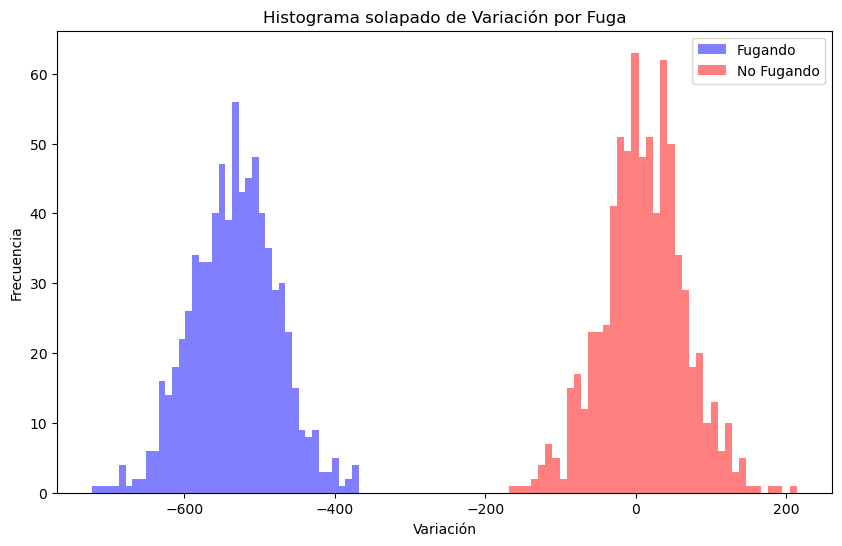

In [58]:
variacion_fuga_true = complete_train_data[complete_train_data['Fugando combustible'] == True]['Variacion']
variacion_fuga_false = complete_train_data[complete_train_data['Fugando combustible'] == False]['Variacion']

# Crear los histogramas solapados
plt.figure(figsize=(10, 6))

LAS_BINAS = 40

plt.hist(variacion_fuga_true, bins=LAS_BINAS, alpha=0.5, label='Fugando', color='blue')
plt.hist(variacion_fuga_false, bins=LAS_BINAS, alpha=0.5, label='No Fugando', color='red')

# Añadir título y etiquetas
plt.title('Histograma solapado de Variación por Fuga')
plt.xlabel('Variación')
plt.ylabel('Frecuencia')

# Añadir leyenda
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


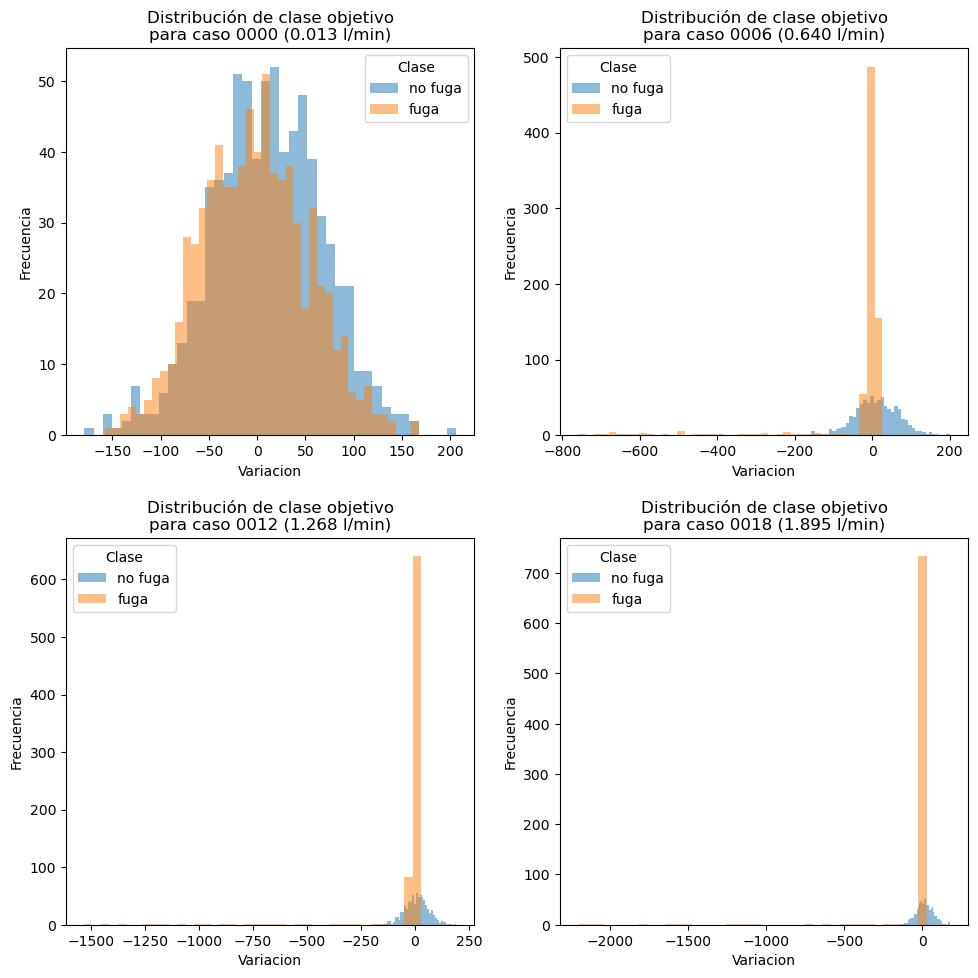

In [15]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10))

for i, axi in enumerate(ax.ravel()):
    case_number = i * 6
    selected_sequence = data_dict[f'case_{case_number:04}']['train_dataframe']
    leak_value = data_dict[f'case_{case_number:04}']['leak_value']

    unique_values = selected_sequence['Fugando combustible'].unique()

    for value in unique_values:
        subset = selected_sequence[selected_sequence['Fugando combustible'] == value]
        axi.hist(subset['Variacion'], bins=40, alpha=0.5, label='fuga' if value == 1 else 'no fuga')

    axi.set_xlabel('Variacion')
    axi.set_ylabel('Frecuencia')
    axi.set_title(f'Distribución de clase objetivo\npara caso {case_number:04} ({leak_value:.3f} l/min)')
    axi.legend(title='Clase')

fig.tight_layout(pad=1.5)

plt.savefig('../../docs/media/histo_variacion.eps', format='eps')
plt.show()

## Implementación de modelos

### Definición de métricas

In [16]:
def leak_detection_delay(y_true: np.array, y_pred: np.array) -> int:
    real_first_leak_day = 0
    while y_true[real_first_leak_day] != 1: real_first_leak_day += 1

    pred_first_leak_day = real_first_leak_day
    while y_pred[pred_first_leak_day] != 1: pred_first_leak_day += 1

    return (pred_first_leak_day - real_first_leak_day)

In [17]:
def performance_metrics(y_true, y_pred, leak_value = 0.013) -> dict:
    return {
        # Valor de referencia
            'leak_value': leak_value,
        # Metricas clasicas de ML
            'accuracy_score':   accuracy_score(y_true, y_pred),
            'f1_score':         f1_score(y_true, y_pred),
            'recall_score':     recall_score(y_true, y_pred),
            'precision_score':  precision_score(y_true, y_pred),
            'confusion_matrix': confusion_matrix(y_true, y_pred),
        # Metricas propias del problema
            'false_positives':  confusion_matrix(y_true, y_pred).ravel()[1],
            'leak_delay':       leak_detection_delay(y_true, y_pred),
            'leak_loss':        leak_detection_delay(y_true, y_pred) * leak_value * 60 * 24 if type(leak_value) != str else None
    }

### Modelo primitivo

In [18]:
class TrivialClassifier:
    def __init__(self, n_bins = 10) -> None:
        self.n_bins = n_bins

    
    def fit(self, D_train) -> None:
        fuga_true = D_train[D_train['Fugando combustible'] == True]['Variacion']
        fuga_false = D_train[D_train['Fugando combustible'] == False]['Variacion']

        def hist_list(subset):
            subset_linspace = np.linspace(min(subset), max(subset), self.n_bins)
            interv_count = [[subset_linspace[i], subset_linspace[i + 1], 0] for i in range(len(subset_linspace) - 1)]
            for value in subset:
                for element in interv_count:
                    if element[0] <= value < element[1]:
                        element[2] += 1
            interv_count[0][0] = float('-inf')
            interv_count[-1][1] = float('inf')
            return interv_count

        self.fuga_true_intervc = hist_list(fuga_true)
        self.fuga_false_intervc = hist_list(fuga_false)


    def predict(self, X_test) -> None:
        y_pred = []

        def find_interval_value(interv_count, selected_value):
            for (lower_bound, upper_bound, value) in interv_count:
                if lower_bound <= selected_value < upper_bound:
                    return value

        for value in X_test:
            true_value = find_interval_value(self.fuga_true_intervc, value)
            false_value = find_interval_value(self.fuga_false_intervc, value)

            y_pred.append(1 if true_value > false_value else 0)
        
        return y_pred

In [19]:
trv_model = TrivialClassifier(n_bins = 40)

trv_model.fit(complete_train_data)

y_pred = trv_model.predict(test_data[0][1]['Variacion'].to_list())

trv_results = [performance_metrics(test_data[0][1]['Fugando combustible'], y_pred, 'unknown')]
trv_seg_results = [
    performance_metrics(the_x[1]['Fugando combustible'], trv_model.predict(the_x[1]['Variacion']), the_x[0])
    for the_x in segmented_test_data
]

### Modelos clásicos

In [20]:
from sklearn.model_selection import GridSearchCV
import pickle as pkl

param_grids_path = '../../pkl/param_grids'

def train_classic_model(classifier_class, param_grid, train_data, cv = 5):
    param_pkl_path = f'{param_grids_path}/{classifier_class.__name__}.pkl'
    classifier = None
    X_train, y_train = train_data
    if os.path.exists(param_pkl_path):  # Param grid already known
        param_grid = pkl.load(open(param_pkl_path, 'rb'))
        classifier = classifier_class(**param_grid)
        classifier.fit(X_train, y_train)
    else:
        grid_search = GridSearchCV(
            estimator = classifier_class(),
            param_grid = param_grid,
            cv = cv
        )
        grid_search.fit(X_train, y_train)
        classifier = grid_search.best_estimator_
        pkl.dump(
            obj = grid_search.best_params_,
            file = open(param_pkl_path, 'wb')
        )
    return classifier

In [21]:
def test_classic_model(classifier, test_list) -> list[dict]:
    results = list()
    for (leak_value, test_data) in test_list:
        X_test = test_data.drop(columns='Fugando combustible')
        y_test = test_data['Fugando combustible']
        y_pred = classifier.predict(X_test)
        results.append(performance_metrics(y_test, y_pred, leak_value))
    return results

##### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = train_classic_model(RandomForestClassifier, rf_param_grid, train_data)

rf_seg_results = test_classic_model(rf_model, segmented_test_data)
rf_results = test_classic_model(rf_model, test_data)

In [23]:
rf_results

[{'leak_value': 'unknown',
  'accuracy_score': 0.8219333333333333,
  'f1_score': 0.8324131007654662,
  'recall_score': 0.8786092715231788,
  'precision_score': 0.7908321411540296,
  'confusion_matrix': array([[11391,  3509],
         [ 1833, 13267]], dtype=int64),
  'false_positives': 3509,
  'leak_delay': 3,
  'leak_loss': None}]

##### Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb_param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

gnb_model = train_classic_model(GaussianNB, gnb_param_grid, train_data)

gnb_seg_results = test_classic_model(gnb_model, segmented_test_data)
gnb_results = test_classic_model(gnb_model, test_data)

##### KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = train_classic_model(KNeighborsClassifier, knn_param_grid, train_data)

knn_seg_results = test_classic_model(knn_model, segmented_test_data)
knn_results = test_classic_model(knn_model, test_data)

##### XGBoost Classifier

In [26]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = train_classic_model(XGBClassifier, xgb_param_grid, train_data)

xgb_seg_results = test_classic_model(xgb_model, segmented_test_data)
xgb_results = test_classic_model(xgb_model, test_data)

##### _Ensemble Classifier_

In [27]:
from sklearn.ensemble import VotingClassifier

vot_model = VotingClassifier(
    estimators=[
        # NOTE: Podría ponerle los hiperparámetros ideales 
        ('rf', RandomForestClassifier()),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('XGB', XGBClassifier())
    ],
    voting='hard'
)

vot_model.fit(train_data[0], train_data[1])

vot_seg_results = test_classic_model(vot_model, segmented_test_data)
vot_results = test_classic_model(vot_model, test_data)

### Modelos _Deep Learning_

In [28]:
def test_dl_model(model, test_list):
    result_list = []
    for leak_value, test_dataframe in test_list:
        X_test = test_dataframe.drop(columns='Fugando combustible')
        y_test = test_dataframe['Fugando combustible']
        
        y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

        result_list.append(performance_metrics(y_test, y_pred, leak_value))

    return result_list

#### Único modelo de _Deep Learning_

In [29]:
X_train, y_train = train_data

##### Modelo unicapa

In [30]:
unil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(15, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

unil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = unil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_unil_seg_results = test_dl_model(unil_model, segmented_test_data)
dl_unil_results = test_dl_model(unil_model, test_data)

##### Modelo multicapa

In [31]:
multil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(25, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(40, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(60, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

multil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = multil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_multil_seg_results = test_dl_model(multil_model, segmented_test_data)
dl_multil_results = test_dl_model(multil_model, test_data)

#### Múltiples modelos de _Deep Learning_

In [32]:
dl_multim_seg_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = data_dict[case]['leak_value']

    X_test = data_dict[case]['test_dataframe'].drop(columns='Fugando combustible')
    y_test = data_dict[case]['test_dataframe']['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_seg_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

In [33]:
dl_multim_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = test_data[0][0]

    X_test = test_data[0][1].drop(columns='Fugando combustible')
    y_test = test_data[0][1]['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

#### Modelo _ensemble_ de mini\_modelos de _Deep Learning_

In [34]:
from scipy.stats import mode

class HomebrewEnsembleClassifier:
    def __init__(self, model_list) -> None:
        self.model_list = model_list
    
    def predict(self, X_input, verbose = 0) -> np.ndarray:
        prediction_list = [model.predict(X_input, verbose=verbose) for model in self.model_list]
        ensemble_predictions, _ = mode(prediction_list, axis=0)
        return ensemble_predictions.ravel()

In [35]:
from tensorflow.keras.models import load_model

pkl_model_dir = '../../pkl/models'

model_list = [load_model(f'{pkl_model_dir}/{filename}') for filename in os.listdir(pkl_model_dir)]

dl_vot_model = HomebrewEnsembleClassifier(model_list)

In [36]:
dl_vot_seg_results = test_dl_model(dl_vot_model, segmented_test_data)
dl_vot_results = test_dl_model(dl_vot_model, test_data)

## Visualización de resultados

### Tablas de resultados

In [37]:
def display_result_table(results, name) -> None:
    df_chikito = pd.DataFrame.from_records(results).drop(columns='confusion_matrix')

    display(pd.DataFrame.from_records(results).drop(columns='confusion_matrix'))

    df_chikito.columns = [column.replace('_', '\\_') for column in df_chikito.columns]

    df_chikito.to_latex(
        f'../../docs/latex/{name.replace(" ", "_")}_table.tex',
        index = False,
        float_format = '%.4f'
    )

#### Trivial Classifier

In [38]:
display_result_table(trv_seg_results, 'Trivial Classifier')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.533333,0.551857,0.570861,0.534077,376,0,0.000000
1,0.117579,0.682667,0.738174,0.888742,0.631232,392,0,0.000000
2,0.222158,0.718667,0.772384,0.948344,0.651501,383,1,319.907368
3,0.326737,0.727333,0.783712,0.981457,0.652289,395,0,0.000000
4,0.431316,0.720667,0.781201,0.990728,0.644828,412,0,0.000000
5,0.535895,0.740667,0.794289,0.994702,0.661092,385,0,0.000000
6,0.640474,0.742667,0.796414,1.000000,0.661700,386,0,0.000000
7,0.745053,0.749333,0.800425,0.998675,0.667848,375,0,0.000000
8,0.849632,0.750667,0.801486,1.000000,0.668733,374,0,0.000000
9,0.954211,0.735333,0.791601,0.998675,0.655652,396,0,0.000000


In [39]:
display_result_table(trv_results, 'Trivial Classifier General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.7274,0.781349,0.967682,0.655188,7690,0,None


#### _Random Forest Classifier_

In [40]:
display_result_table(rf_seg_results, 'Random Forest')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.508000,0.342246,0.254305,0.523161,175,3,56.160000
1,0.117579,0.715333,0.702024,0.666225,0.741888,175,0,0.000000
2,0.222158,0.801333,0.806744,0.823841,0.790343,165,1,319.907368
3,0.326737,0.818000,0.832823,0.900662,0.774487,198,0,0.000000
4,0.431316,0.832000,0.847273,0.925828,0.781006,196,0,0.000000
5,0.535895,0.843333,0.856445,0.928477,0.794785,181,0,0.000000
6,0.640474,0.850000,0.860681,0.920530,0.808140,165,0,0.000000
7,0.745053,0.848667,0.860822,0.929801,0.801370,174,0,0.000000
8,0.849632,0.852000,0.863636,0.931126,0.805269,170,0,0.000000
9,0.954211,0.859333,0.871576,0.948344,0.806306,172,0,0.000000


In [41]:
display_result_table(rf_results, 'Random Forest General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.821933,0.832413,0.878609,0.790832,3509,3,None


#### _Naive Bayes Classifier_

In [42]:
display_result_table(gnb_seg_results, 'Gaussian NB')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.517333,0.233051,0.145695,0.582011,79,22,411.840000
1,0.117579,0.532667,0.295477,0.194702,0.612500,93,0,0.000000
2,0.222158,0.518000,0.246090,0.156291,0.578431,86,1,319.907368
3,0.326737,0.502667,0.196121,0.120530,0.526012,82,0,0.000000
4,0.431316,0.490000,0.169381,0.103311,0.469880,88,0,0.000000
5,0.535895,0.485333,0.147903,0.088742,0.443709,84,0,0.000000
6,0.640474,0.460000,0.125270,0.076821,0.339181,113,0,0.000000
7,0.745053,0.476000,0.116854,0.068874,0.385185,83,0,0.000000
8,0.849632,0.459333,0.093855,0.055629,0.300000,98,0,0.000000
9,0.954211,0.466667,0.088838,0.051656,0.317073,84,0,0.000000


In [43]:
display_result_table(gnb_results, 'Gaussian NB General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.473067,0.119528,0.07106,0.375964,1781,22,None


#### _KNN Classifier_

In [44]:
display_result_table(knn_seg_results, 'KNN')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.510667,0.342294,0.252980,0.529086,170,3,56.160000
1,0.117579,0.707333,0.689314,0.645033,0.740122,171,0,0.000000
2,0.222158,0.798000,0.802090,0.813245,0.791237,162,1,319.907368
3,0.326737,0.808000,0.821561,0.878146,0.771828,196,0,0.000000
4,0.431316,0.820667,0.835273,0.903311,0.776765,196,0,0.000000
5,0.535895,0.840000,0.852941,0.921854,0.793615,181,0,0.000000
6,0.640474,0.840000,0.849057,0.894040,0.808383,160,0,0.000000
7,0.745053,0.844667,0.856262,0.919205,0.801386,172,0,0.000000
8,0.849632,0.842667,0.853960,0.913907,0.801394,171,0,0.000000
9,0.954211,0.844667,0.856615,0.921854,0.800000,174,0,0.000000


In [45]:
display_result_table(knn_results, 'KNN General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.8141,0.823351,0.860728,0.789084,3474,3,None


#### _XGBoost Classifier_

In [46]:
display_result_table(xgb_seg_results, 'XGBoost')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.503333,0.328224,0.241060,0.514124,172,3,56.160000
1,0.117579,0.712667,0.697544,0.658278,0.741791,173,0,0.000000
2,0.222158,0.801333,0.806494,0.822517,0.791083,164,1,319.907368
3,0.326737,0.819333,0.833640,0.899338,0.776888,195,0,0.000000
4,0.431316,0.834000,0.848263,0.921854,0.785553,190,0,0.000000
5,0.535895,0.844667,0.856615,0.921854,0.800000,174,0,0.000000
6,0.640474,0.846667,0.857497,0.916556,0.805588,167,0,0.000000
7,0.745053,0.847333,0.859767,0.929801,0.799544,176,0,0.000000
8,0.849632,0.858667,0.869939,0.939073,0.810286,166,0,0.000000
9,0.954211,0.857333,0.869671,0.945695,0.804961,173,0,0.000000


In [47]:
display_result_table(xgb_results, 'XGBoost General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.822667,0.832778,0.877285,0.792569,3467,3,None


#### _Ensemble Classifier_

In [48]:
display_result_table(vot_seg_results, 'Ensemble')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.516667,0.319249,0.225166,0.548387,140,5,93.600000
1,0.117579,0.705333,0.673077,0.602649,0.762144,142,0,0.000000
2,0.222158,0.785333,0.779150,0.752318,0.807966,135,1,319.907368
3,0.326737,0.791333,0.795291,0.805298,0.785530,166,0,0.000000
4,0.431316,0.808667,0.813515,0.829139,0.798469,158,0,0.000000
5,0.535895,0.817333,0.820681,0.830464,0.811125,146,0,0.000000
6,0.640474,0.823333,0.825543,0.830464,0.820681,137,0,0.000000
7,0.745053,0.809333,0.811096,0.813245,0.808959,145,0,0.000000
8,0.849632,0.823333,0.826001,0.833113,0.819010,139,0,0.000000
9,0.954211,0.828667,0.831475,0.839735,0.823377,136,0,0.000000


In [49]:
display_result_table(vot_results, 'Ensemble General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.795167,0.793951,0.78404,0.804116,2884,5,None


#### Modelo DL unicapa

In [50]:
display_result_table(dl_unil_seg_results, 'DL Unicapa')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.535333,0.515636,0.491391,0.542398,313,0,0.000000
1,0.117579,0.638000,0.665022,0.713907,0.622402,327,8,1354.509474
2,0.222158,0.684000,0.718193,0.800000,0.651564,323,73,23353.237895
3,0.326737,0.700000,0.740484,0.850331,0.655771,337,57,26818.560000
4,0.431316,0.722667,0.761741,0.880795,0.671039,326,59,36644.589474
5,0.535895,0.727333,0.766952,0.891391,0.673000,327,50,38584.421053
6,0.640474,0.740000,0.778157,0.905960,0.681954,319,58,53492.362105
7,0.745053,0.743333,0.781126,0.909934,0.684263,317,47,50425.162105
8,0.849632,0.745333,0.785393,0.925828,0.681951,326,42,51385.717895
9,0.954211,0.752000,0.789354,0.923179,0.689416,314,39,53588.463158


In [51]:
display_result_table(dl_unil_results, 'DL Unicapa General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.729533,0.767507,0.886954,0.676414,6407,0,None


#### Modelo DL multicapa

In [52]:
display_result_table(dl_multil_seg_results, 'DL Multicapa')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.505333,0.360345,0.276821,0.516049,196,0,0.000000
1,0.117579,0.682000,0.667132,0.633113,0.705015,200,29,4910.096842
2,0.222158,0.747333,0.753094,0.765563,0.741026,202,73,23353.237895
3,0.326737,0.761333,0.779285,0.837086,0.728950,235,57,26818.560000
4,0.431316,0.792667,0.812085,0.890066,0.746667,228,1,621.094737
5,0.535895,0.814667,0.832126,0.912583,0.764706,212,1,771.688421
6,0.640474,0.825333,0.841596,0.921854,0.774194,203,1,922.282105
7,0.745053,0.822667,0.840144,0.925828,0.768977,210,1,1072.875789
8,0.849632,0.845333,0.861740,0.957616,0.783315,200,0,0.000000
9,0.954211,0.836000,0.853919,0.952318,0.773950,210,0,0.000000


In [53]:
display_result_table(dl_multil_results, 'DL Multicapa General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.803233,0.818843,0.88351,0.762997,4144,0,None


#### Modelo DL multiple

In [54]:
display_result_table(dl_multim_seg_results, 'DL Multimodelo')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.566000,0.574232,0.581457,0.567183,335,1,18.720000
1,0.117579,0.653333,0.640884,0.614570,0.669553,229,0,0.000000
2,0.222158,0.530000,0.681716,1.000000,0.517123,705,0,0.000000
3,0.326737,0.662000,0.666667,0.671523,0.661880,259,0,0.000000
4,0.431316,0.760667,0.760826,0.756291,0.765416,175,85,52793.052632
5,0.535895,0.763333,0.739927,0.668874,0.827869,105,68,52474.812632
6,0.640474,0.692667,0.626721,0.512583,0.806250,93,60,55336.926316
7,0.745053,0.796667,0.820483,0.923179,0.738347,247,54,57935.292632
8,0.849632,0.499333,0.517042,0.532450,0.502500,398,43,52609.187368
9,0.954211,0.810667,0.827670,0.903311,0.763718,211,40,54962.526316


In [55]:
display_result_table(dl_multim_results, 'DL Multimodelo General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.588667,0.633218,0.705430,0.574418,7892,0,None
1,unknown,0.792000,0.797954,0.816026,0.780664,3462,3,None
2,unknown,0.468133,0.634891,0.918742,0.485036,14729,0,None
3,unknown,0.561233,0.550643,0.534106,0.568238,6128,1,None
4,unknown,0.583367,0.599917,0.620596,0.580571,6770,1,None
5,unknown,0.593533,0.601373,0.609139,0.593802,6292,1,None
6,unknown,0.645367,0.676045,0.735166,0.625726,6640,1,None
7,unknown,0.741900,0.701331,0.602053,0.839815,1734,5,None
8,unknown,0.638800,0.713530,0.893709,0.593813,9231,0,None
9,unknown,0.691933,0.737413,0.859404,0.645750,7119,1,None


#### Modelo DL _ensemble_

In [56]:
display_result_table(dl_vot_seg_results, 'DL Ensemble')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.496667,0.062112,0.033113,0.500000,25,5,93.600000
1,0.117579,0.546667,0.232506,0.136424,0.786260,28,150,25397.052632
2,0.222158,0.555333,0.241183,0.140397,0.854839,18,103,32950.458947
3,0.326737,0.567333,0.289157,0.174834,0.835443,26,95,44697.600000
4,0.431316,0.578000,0.306681,0.185430,0.886076,18,86,53414.147368
5,0.535895,0.578667,0.318966,0.196026,0.855491,25,80,61735.073684
6,0.640474,0.581333,0.318872,0.194702,0.880240,20,62,57181.490526
7,0.745053,0.578000,0.315676,0.193377,0.858824,24,63,67591.174737
8,0.849632,0.590667,0.344017,0.213245,0.889503,20,50,61173.473684
9,0.954211,0.566667,0.277778,0.165563,0.862069,20,54,74199.410526


In [57]:
display_result_table(dl_vot_results, 'DL Ensemble General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.5717,0.29737,0.180066,0.853153,468,5,None


### Matrices de confusión

In [58]:
def display_conf_matrix(confusion_matrix, name):
    disp = ConfusionMatrixDisplay(
        confusion_matrix,
        display_labels=['No fuga', 'Fuga']
    ).plot(colorbar=False)

    plt.title(f'Resultados de {name}', fontsize=14)

    plt.xlabel('Etiqueta Predicha', fontsize=12)
    plt.ylabel('Etiqueta Verdadera', fontsize=12)

    for text in disp.text_.ravel():
        text.set_fontsize(11)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.savefig(
        f'../../docs/media/cm_{name.replace(" ", "_")}.eps',
        format='eps'    
    )

#### Trivial Classifier

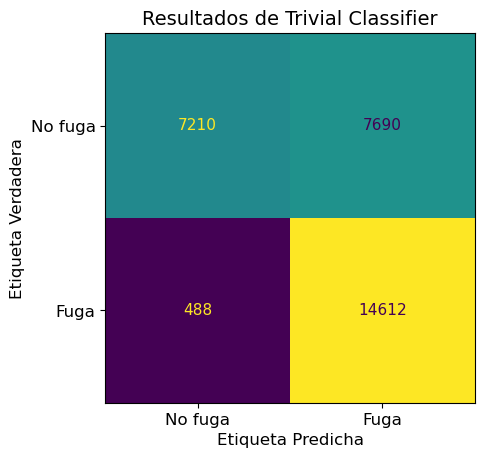

In [59]:
display_conf_matrix(trv_results[0]['confusion_matrix'], 'Trivial Classifier')

#### _Random Forest Classifier_

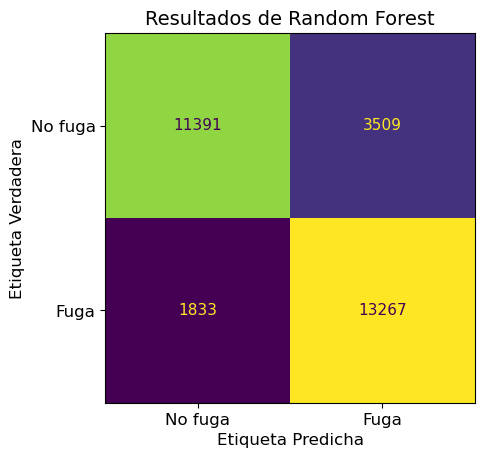

In [60]:
display_conf_matrix(rf_results[0]['confusion_matrix'], 'Random Forest')

#### _Gaussian NB Classifier_

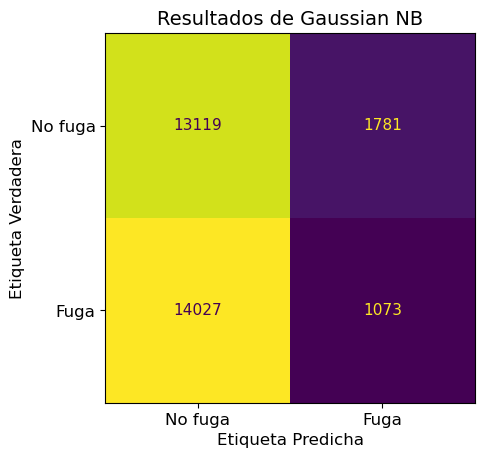

In [61]:
display_conf_matrix(gnb_results[0]['confusion_matrix'], 'Gaussian NB')

#### _KNN Classifier_

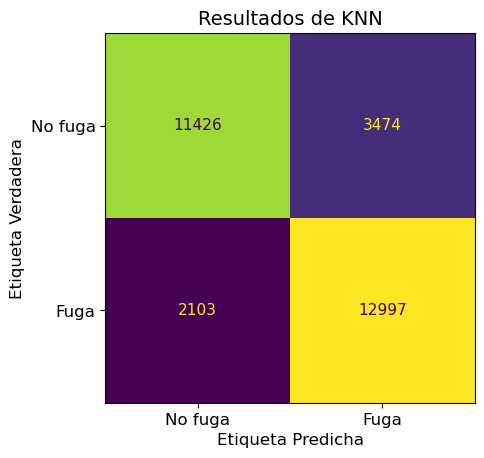

In [62]:
display_conf_matrix(knn_results[0]['confusion_matrix'], 'KNN')

#### _XGBoost Classifier_

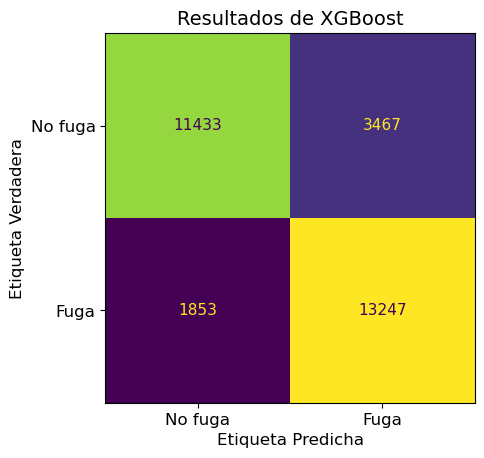

In [63]:
display_conf_matrix(xgb_results[0]['confusion_matrix'], 'XGBoost')

#### _Ensemble Classifier_

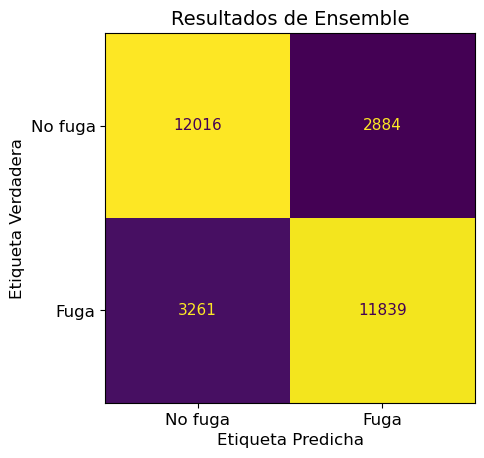

In [64]:
display_conf_matrix(vot_results[0]['confusion_matrix'], 'Ensemble')

#### Modelo DL unicapa

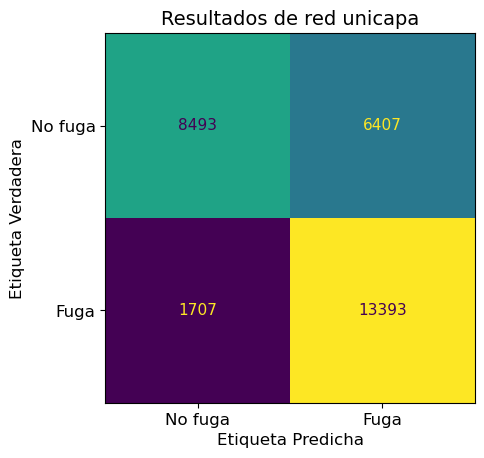

In [65]:
display_conf_matrix(dl_unil_results[0]['confusion_matrix'], 'red unicapa')

#### Modelo DL multicapa

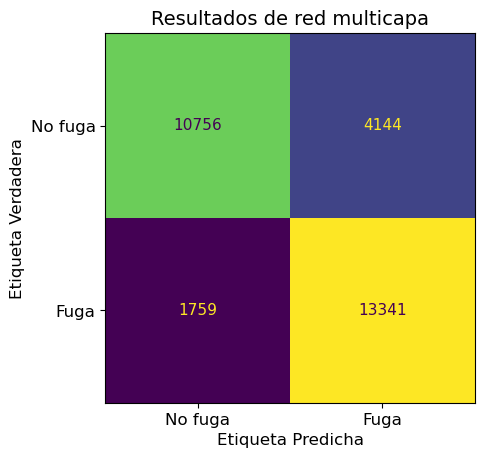

In [66]:
display_conf_matrix(dl_multil_results[0]['confusion_matrix'], 'red multicapa')

#### Modelo DL _ensemble_

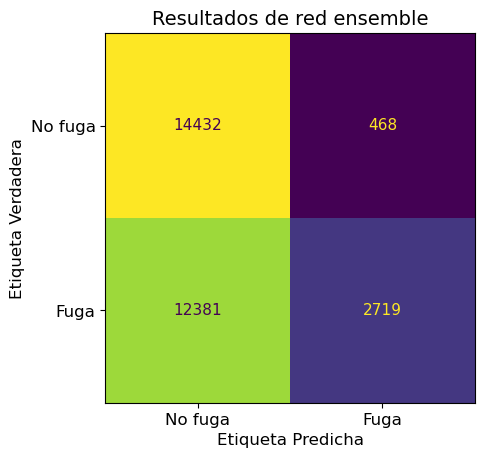

In [67]:
display_conf_matrix(dl_vot_results[0]['confusion_matrix'], 'red ensemble')

### Otros

In [68]:
display_seg_list = [
    ('Trivial Classifier',  trv_seg_results),
    ('Random Forest',       rf_seg_results),
    ('Gaussian NB',         gnb_seg_results),
    ('KNN',                 knn_seg_results),
    ('XGBoost',             xgb_seg_results),
    ('Ensemble',            vot_seg_results),
    ('LSTM unilayer',       dl_unil_seg_results),
    ('LSTM multilayer',     dl_multil_seg_results),
    ('LSTM ensemble',       dl_vot_seg_results)
]

In [69]:
display_list = [
    ('Trivial Classifier',  trv_results),
    ('Random Forest',       rf_results),
    ('Gaussian NB',         gnb_results),
    ('KNN',                 knn_results),
    ('XGBoost',             xgb_results),
    ('Ensemble',            vot_results),
    ('DL unilayer',         dl_unil_results),
    ('DL multilayer',       dl_multil_results),
    ('DL ensemble',         dl_vot_results)
]

#### Comparativa de falsos positivos

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


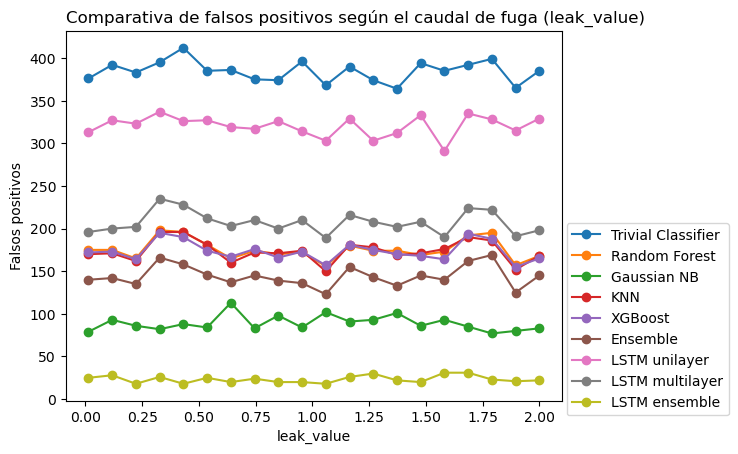

In [70]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['false_positives'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de falsos positivos según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Falsos positivos')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_falsos_positivos.eps', format='eps')

plt.show()

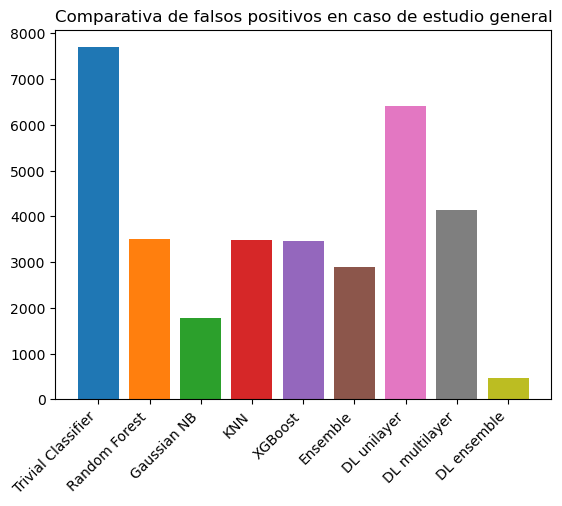

In [71]:
for (name, results) in display_list:
    plt.bar(name, results[0]['false_positives'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de falsos positivos en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_falsos_positivos_g.eps', format='eps')

plt.show()

#### Comparativa de sensibilidad (_recall_)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


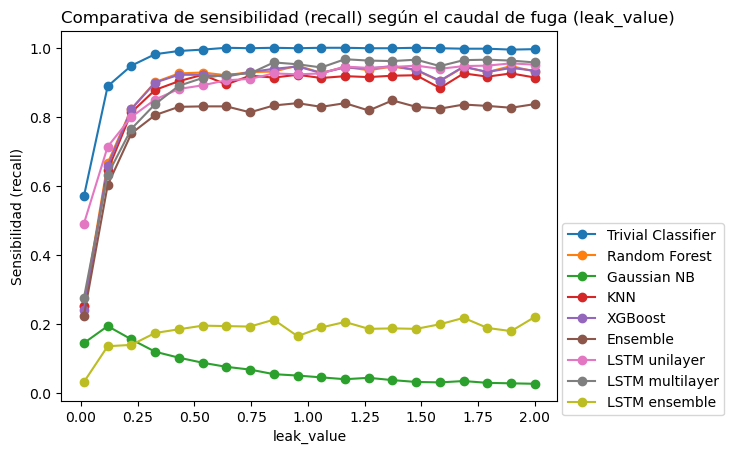

In [72]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['recall_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de sensibilidad (recall) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Sensibilidad (recall)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_recall.eps', format='eps')

plt.show()

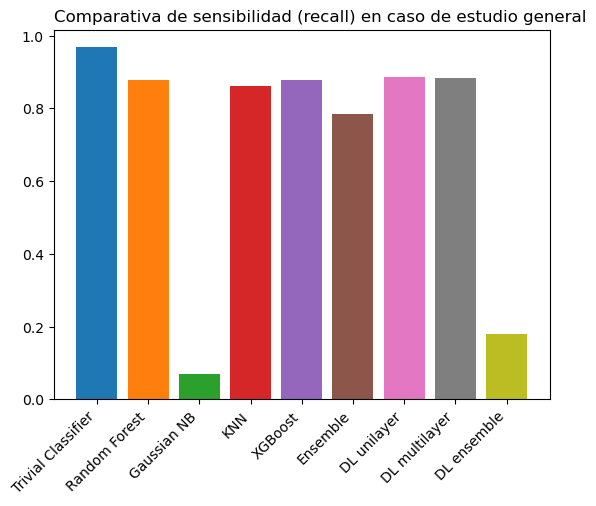

In [73]:
for (name, results) in display_list:
    plt.bar(name, results[0]['recall_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de sensibilidad (recall) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_recall_g.eps', format='eps')

plt.show()

#### Comparativa de exactitud (_accuracy_)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


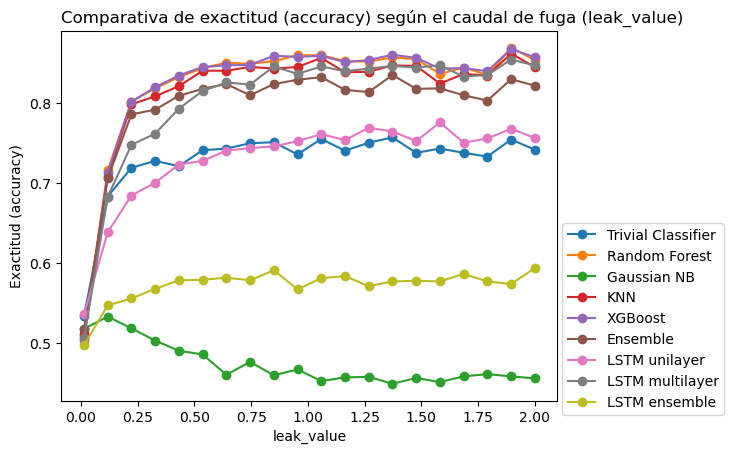

In [74]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['accuracy_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de exactitud (accuracy) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Exactitud (accuracy)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_accuracy.eps', format='eps')

plt.show()

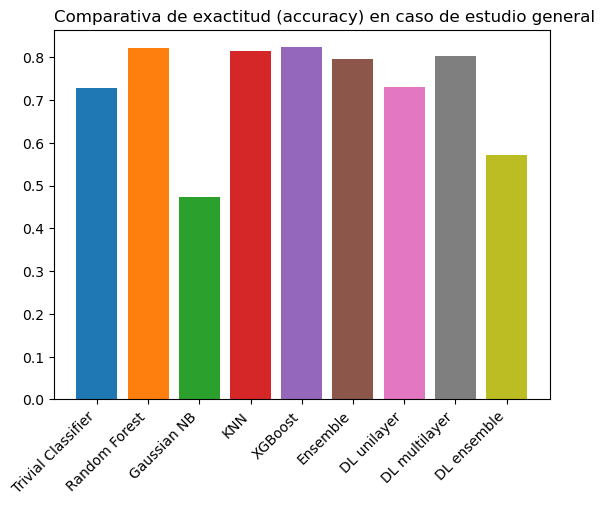

In [75]:
for (name, results) in display_list:
    plt.bar(name, results[0]['accuracy_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de exactitud (accuracy) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_accuracy_g.eps', format='eps')

plt.show()

#### Comparativa de días hasta detección de fuga 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


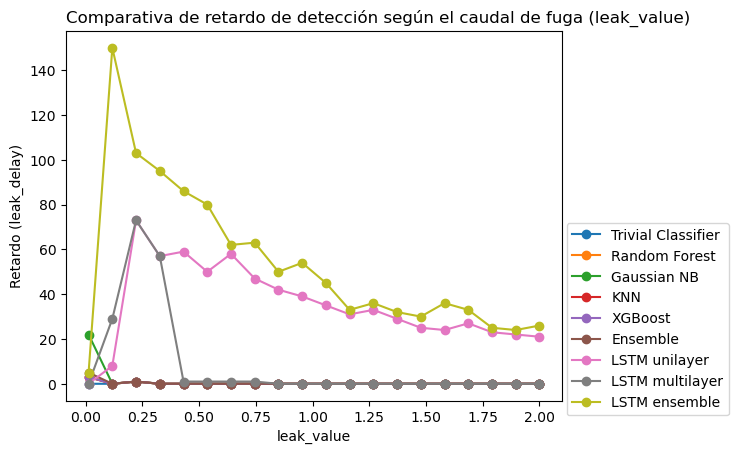

In [76]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['leak_delay'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de retardo de detección según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Retardo (leak_delay)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_leak_delay.eps', format='eps')

plt.show()

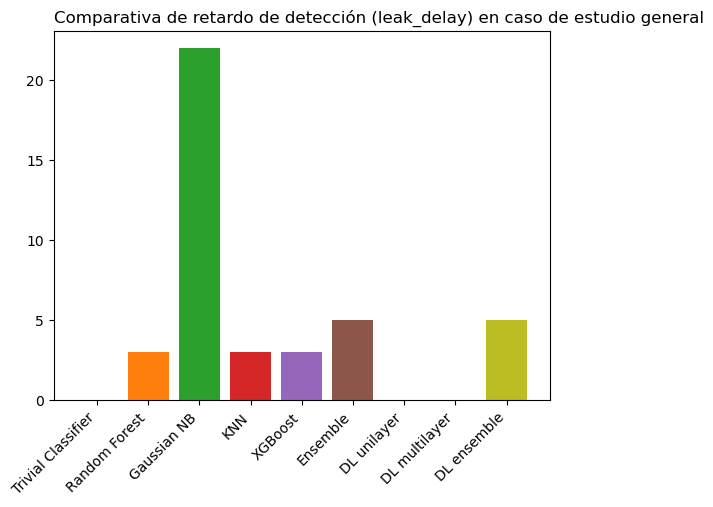

In [77]:
for (name, results) in display_list:
    plt.bar(name, results[0]['leak_delay'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de retardo de detección (leak_delay) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_leak_delay_g.eps', format='eps')

plt.show()